In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import librosa
audio_data = '/home/k0c/audio_study/hiphop.00011.wav'
y , sr = librosa.load(audio_data)

print(y) 
print(len(y))
print('Sampling rate (Hz): %d' %sr)
print('Audio length (seconds): %.2f' % (len(y) / sr)) #음악의 길이(초) = 음파의 길이/Sampling rate

[-0.07696533 -0.11022949 -0.07870483 ... -0.0569458  -0.04589844
 -0.05361938]
661794
Sampling rate (Hz): 22050
Audio length (seconds): 30.01


In [3]:
import IPython.display as ipd
ipd.Audio(y, rate=sr)

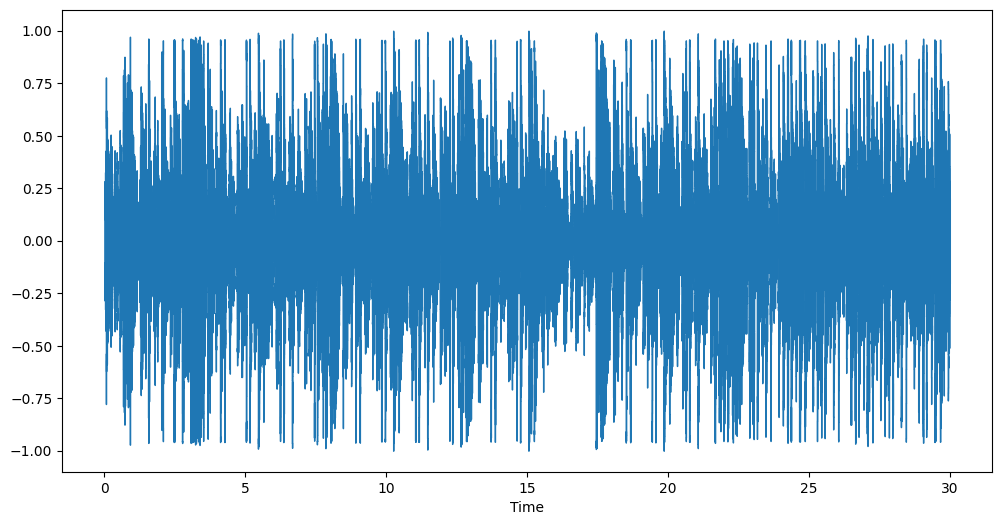

In [4]:
# 2D 음파그래프
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize =(12,6))
librosa.display.waveshow(y=y,sr=sr)
plt.show()

(1025, 1293)


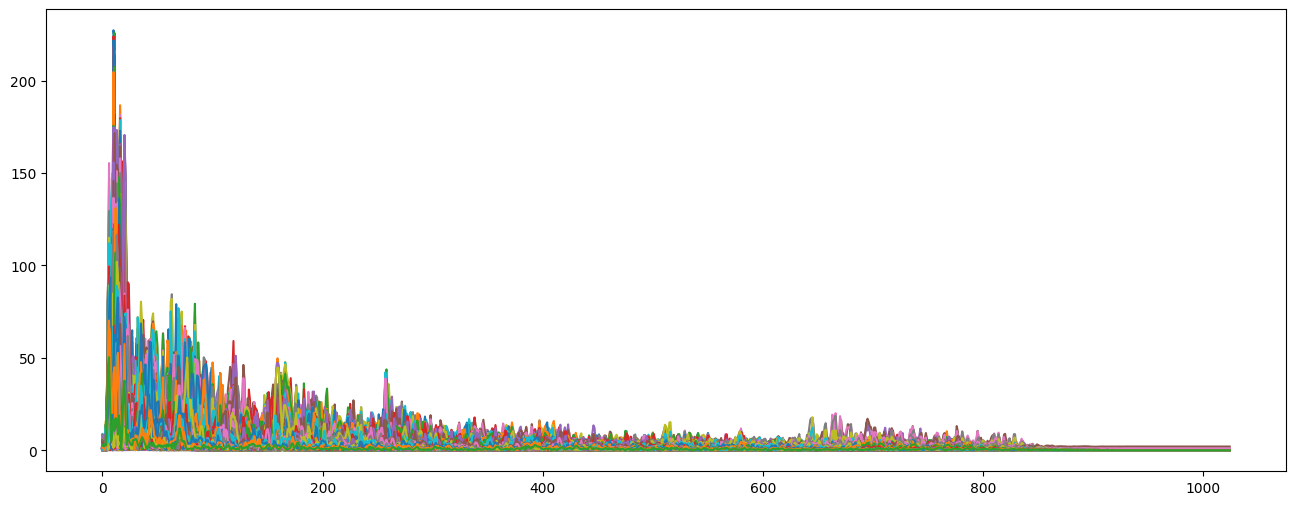

In [5]:
# 푸리에 변환
import numpy as np

D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512)) #n_fft : window size / 음성의 길이를 얼마만큼으로 자를 것인가?

print(D.shape)

plt.figure(figsize=(16,6))
plt.plot(D)
plt.show()

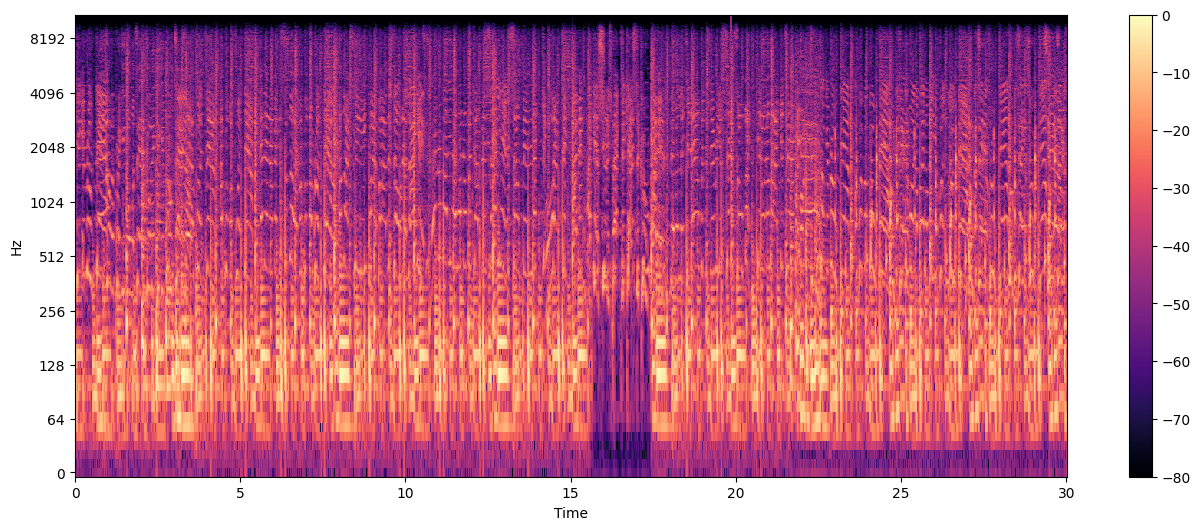

In [6]:
# spectrogram
DB = librosa.amplitude_to_db(D, ref=np.max) #amplitude(진폭) -> DB(데시벨)로 바꿔라

plt.figure(figsize=(16,6))
librosa.display.specshow(DB,sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

/home/k0c/.conda/envs/0chae/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.07696533 -0.11022949 -0.07870483 ... -0.0569458  -0.04589844
 -0.05361938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


[[3.85236454e+00 1.97025490e+00 1.89779031e+00 ... 1.76347637e+00
  3.36900139e+00 4.54292870e+00]
 [1.55856037e+01 4.90592575e+01 1.16946678e+02 ... 6.30053978e+01
  1.96705902e+02 1.32915924e+02]
 [1.26387993e+02 1.93138275e+02 2.21823624e+02 ... 1.08316658e+02
  2.01887726e+02 7.61777115e+01]
 ...
 [1.46806688e-05 5.98844781e-06 4.03888680e-06 ... 4.41224483e-06
  1.10434121e-05 5.86031929e-05]
 [1.17050313e-05 3.00830879e-06 1.83144678e-07 ... 2.88793757e-07
  1.56701674e-06 5.10377467e-05]
 [1.09349639e-05 2.69547445e-06 8.36386782e-09 ... 1.02829905e-08
  9.46550927e-07 4.95014901e-05]]


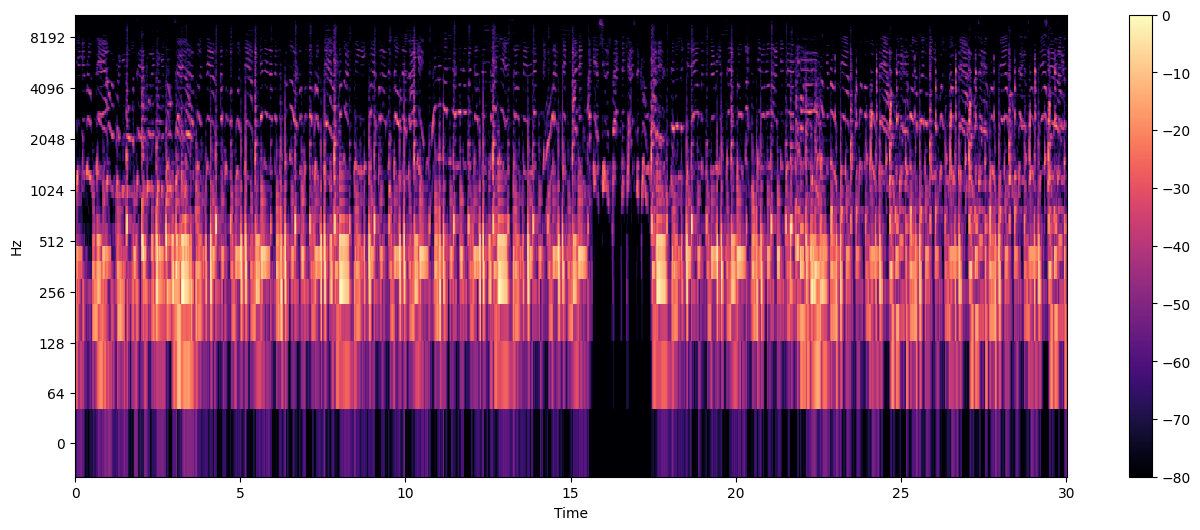

In [7]:
# Mel Spectogram
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

print(S)
plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, sr=sr,hop_length=512, x_axis='time',y_axis='log')
plt.colorbar()
plt.show()

/home/k0c/.conda/envs/0chae/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Pass y=[-0.01138306 -0.00216675  0.01687622 ... -0.02954102 -0.0378418
 -0.03924561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


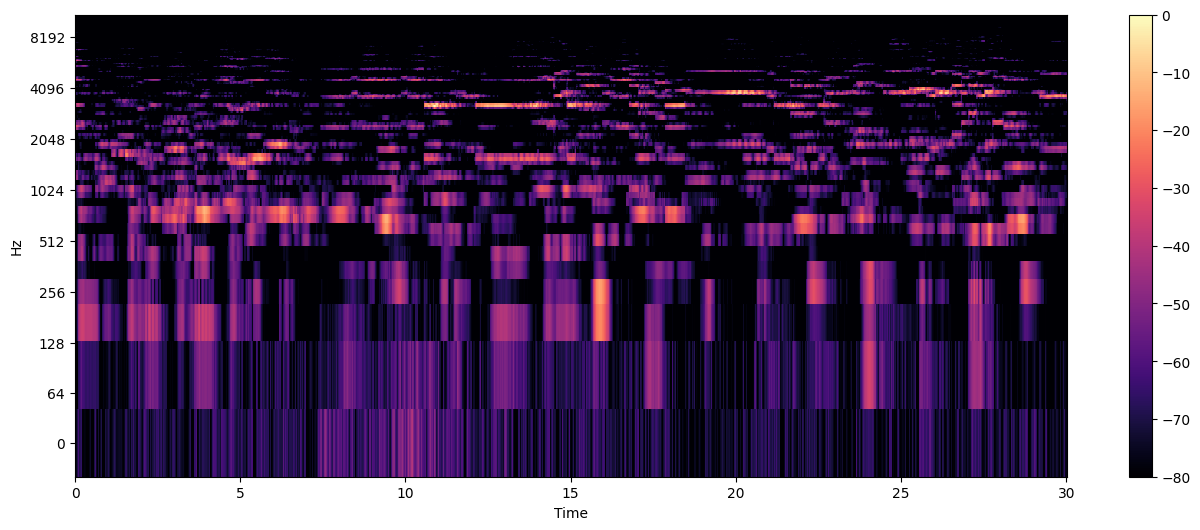

In [8]:
y, sr = librosa.load('/home/k0c/audio_study/classical.00001.wav')
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, sr=sr,hop_length=512, x_axis='time',y_axis='log')
plt.colorbar()
plt.show()

### 오디오 특성 추출

In [9]:
# Tempo(BPM)
tempo , _ = librosa.beat.beat_track(y,sr=sr)     
print(tempo)

112.34714673913044


/home/k0c/.conda/envs/0chae/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.01138306 -0.00216675  0.01687622 ... -0.02954102 -0.0378418
 -0.03924561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


In [10]:
# zero crossing rate 음파가 양에서 음으로 / 음에서 양으로 바뀌는 횟수
zero_crossings = librosa.zero_crossings(y, pad=False)

print(zero_crossings)
print(sum(zero_crossings)) # 음 <-> 양 이동한 횟수

[False False  True ... False False False]
58180


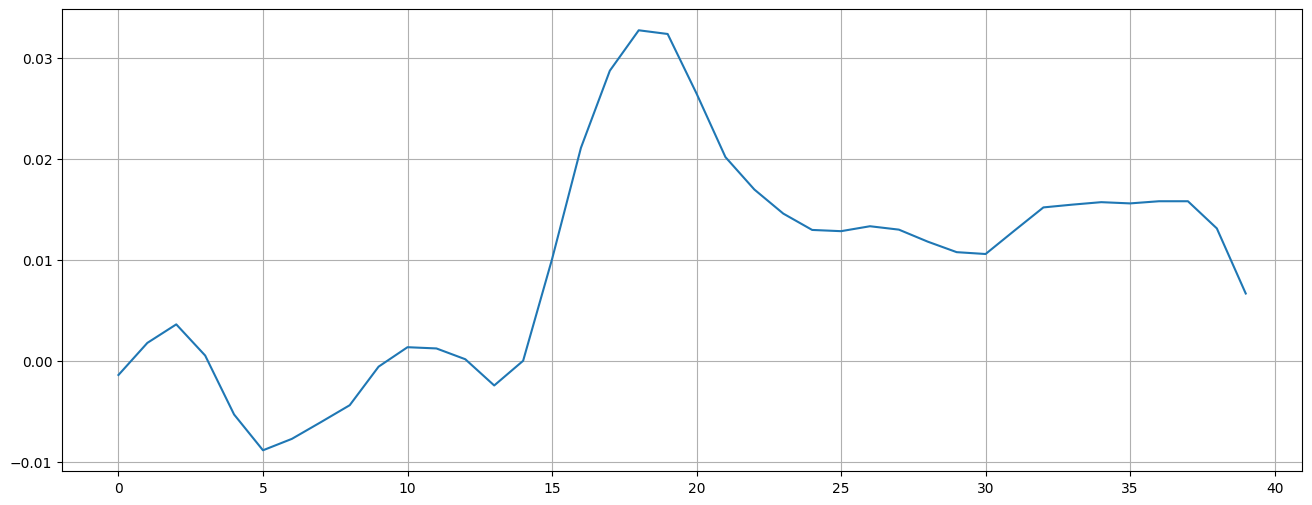

In [11]:
# 확대해서 보면(9000~9040 사이의 값으로) zero crossing은 0이 되는 선을 지나친 횟수
n0 = 9000
n1 = 9040

plt.figure(figsize=(16,6))
plt.plot(y[n0:n1])
plt.grid()
plt.show()

In [12]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False) #n0 ~ n1 사이 zero crossings 
print(sum(zero_crossings))

5


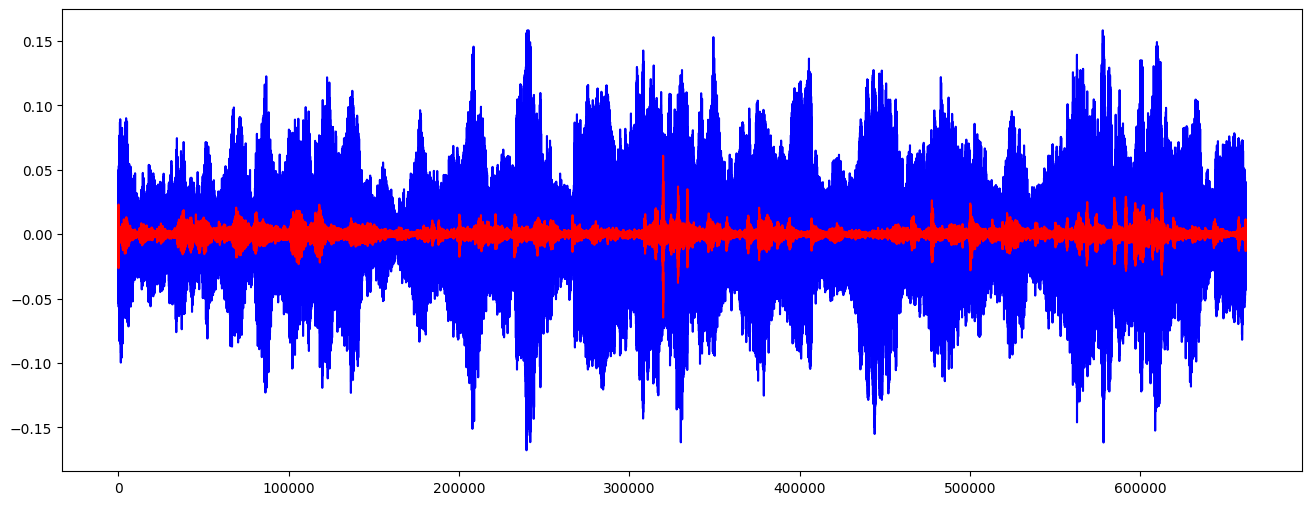

In [13]:
# Harmonic and Percussive Components
# Harmonics : 사람의 귀로 구분할 수 없는 특징들(음악의 색깔)
# Percussives: 리듬과 감정을 나타내는 충격파
y_harm, y_perc = librosa.effects.hpss(y)

plt.figure(figsize=(16,6))
plt.plot(y_harm, color='b')
plt.plot(y_perc, color='r')
plt.show()

/home/k0c/.conda/envs/0chae/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Pass y=[-0.01138306 -0.00216675  0.01687622 ... -0.02954102 -0.0378418
 -0.03924561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


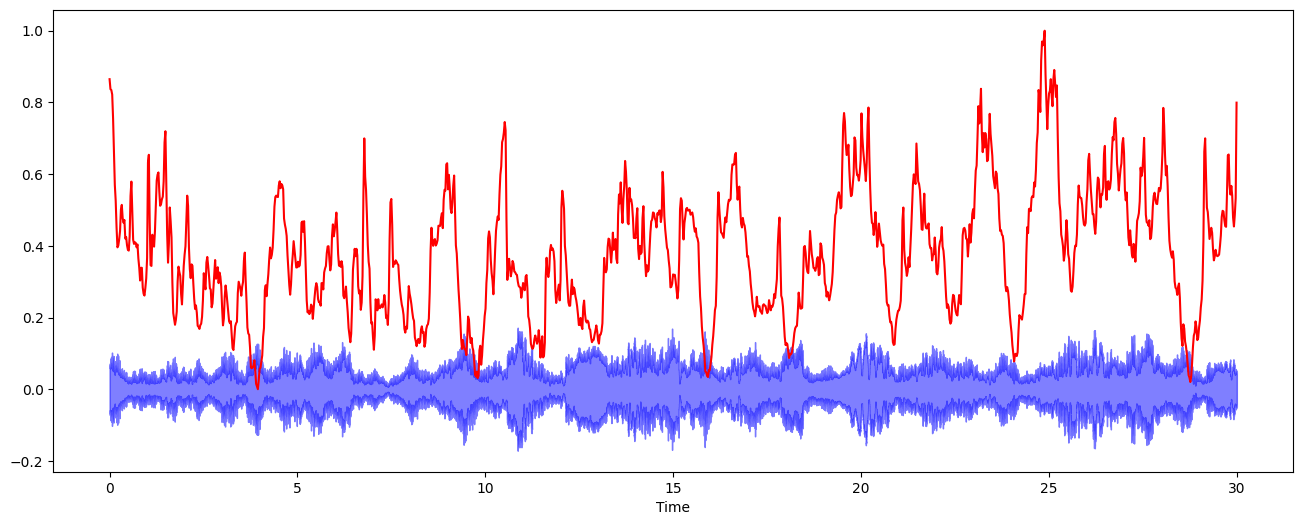

In [14]:
# Spectral Centroid
#소리를 주파수 표현했을 때, 주파수의 가중평균을 계산하여 소리의 "무게 중심"이 어딘지를 알려주는 지표
# 예를 들어, 블루스 음악은 무게 중심이 가운데 부분에 놓여있는 반면, 메탈 음악은 (끝 부분에서 달리기 때문에) 노래의 마지막 부분에 무게 중심이 실린다.
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]

#Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)    #sk.minmax_scale() : 최대 최소를 0 ~ 1 로 맞춰준다.

plt.figure(figsize=(16,6))
librosa.display.waveshow(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

/home/k0c/.conda/envs/0chae/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Pass y=[-0.00138306  0.00783325  0.02687622 ... -0.01954102 -0.0278418
 -0.02924561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until
/home/k0c/.conda/envs/0chae/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Pass y=[-0.00138306  0.00783325  0.02687622 ... -0.01954102 -0.0278418
 -0.02924561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.
/home/k0c/.conda/envs/0chae/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[-0.00138306  0.00783325  0.02687622 ... -0.01954102 -0.0278418
 -0.02924561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


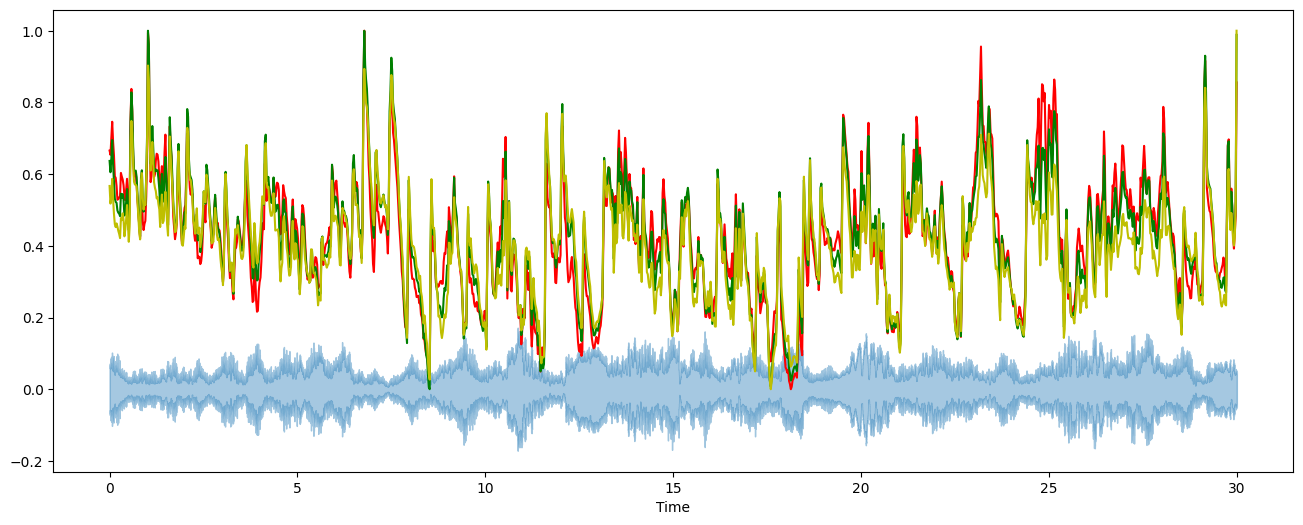

In [15]:
# Spectral Bandwidth

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=2)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]

plt.figure(figsize=(16,6))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')



/home/k0c/.conda/envs/0chae/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Pass y=[-0.01138306 -0.00216675  0.01687622 ... -0.02954102 -0.0378418
 -0.03924561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


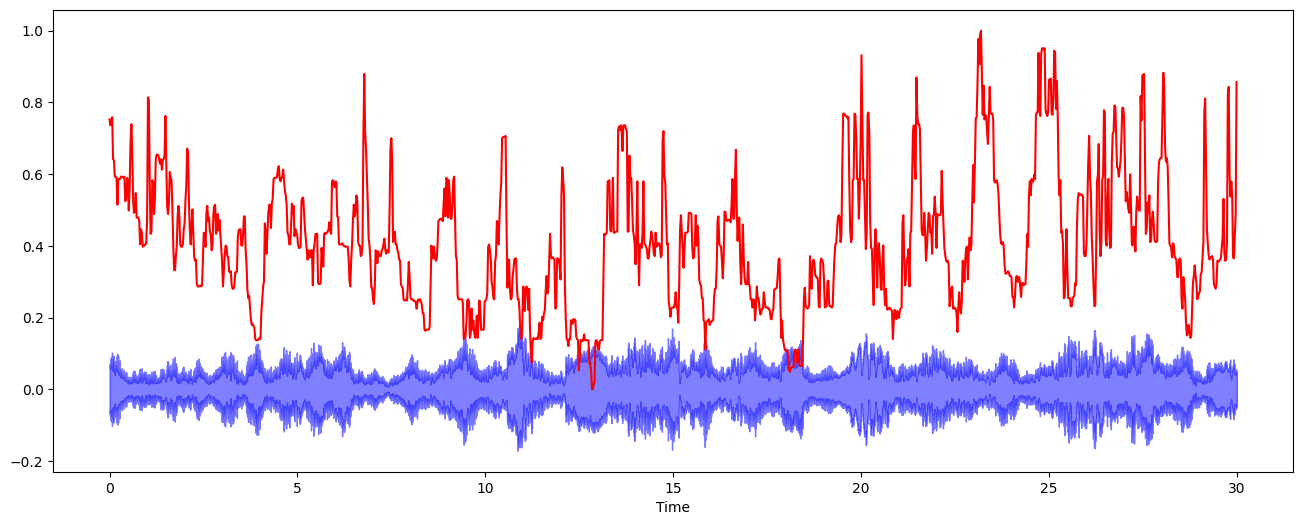

In [16]:
# Spectral Rolloff
#신호 모양을 측정한다.
# 총 스펙트럴 에너지 중 낮은 주파수(85% 이하)에 얼마나 많이 집중되어 있는가
spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]

plt.figure(figsize=(16,6))
librosa.display.waveshow(y,sr=sr,alpha=0.5,color='b')
plt.plot(t, normalize(spectral_rolloff),color='r')
plt.show()

/home/k0c/.conda/envs/0chae/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.01138306 -0.00216675  0.01687622 ... -0.02954102 -0.0378418
 -0.03924561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


mean: 0.51
var: 0.03


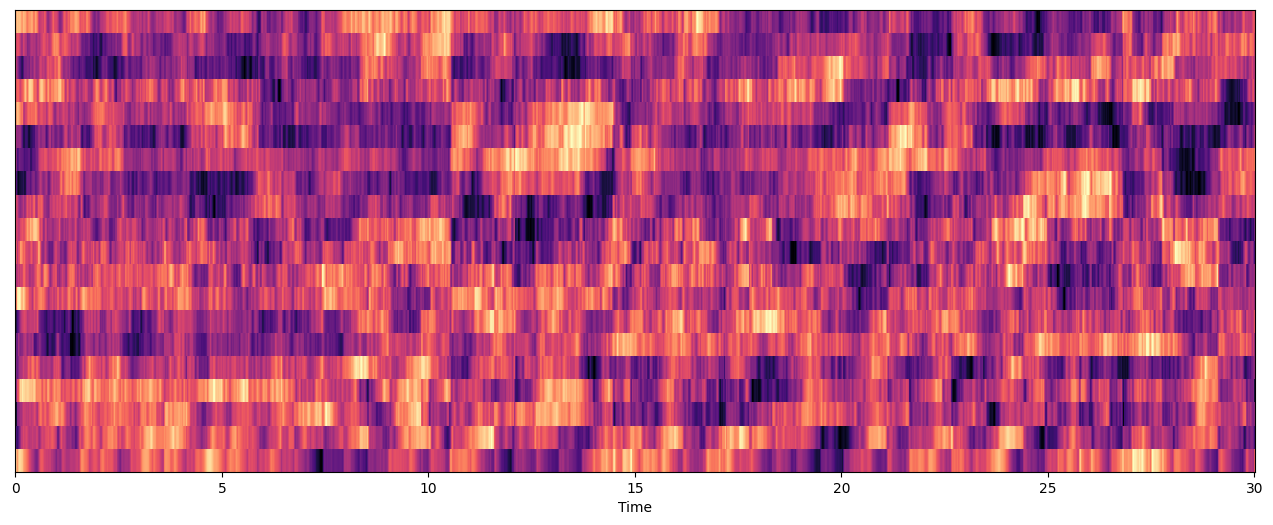

In [17]:
# Mel-Frequency Cepstral Coefficients(MFCC)
mfccs = librosa.feature.mfcc(y, sr=sr)
mfccs = normalize(mfccs,axis=1)

print('mean: %.2f' % mfccs.mean())
print('var: %.2f' % mfccs.var())

plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs,sr=sr, x_axis='time')
plt.show()

In [18]:
mfccs

array([[0.84513116, 0.86202407, 0.7819003 , ..., 0.48105347, 0.45448804,
        0.6496155 ],
       [0.29342616, 0.22709513, 0.190979  , ..., 0.37732375, 0.3305912 ,
        0.21941769],
       [0.00417024, 0.09863102, 0.3762304 , ..., 0.39008212, 0.37078756,
        0.42179477],
       ...,
       [0.45089668, 0.50815994, 0.428724  , ..., 0.5835514 , 0.5186448 ,
        0.49767423],
       [0.55188084, 0.590713  , 0.6149124 , ..., 0.68604046, 0.6679691 ,
        0.56637585],
       [0.8114513 , 0.8318684 , 0.87168473, ..., 0.5818307 , 0.6299951 ,
        0.625247  ]], dtype=float32)

/home/k0c/.conda/envs/0chae/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Pass y=[-0.01138306 -0.00216675  0.01687622 ... -0.02954102 -0.0378418
 -0.03924561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


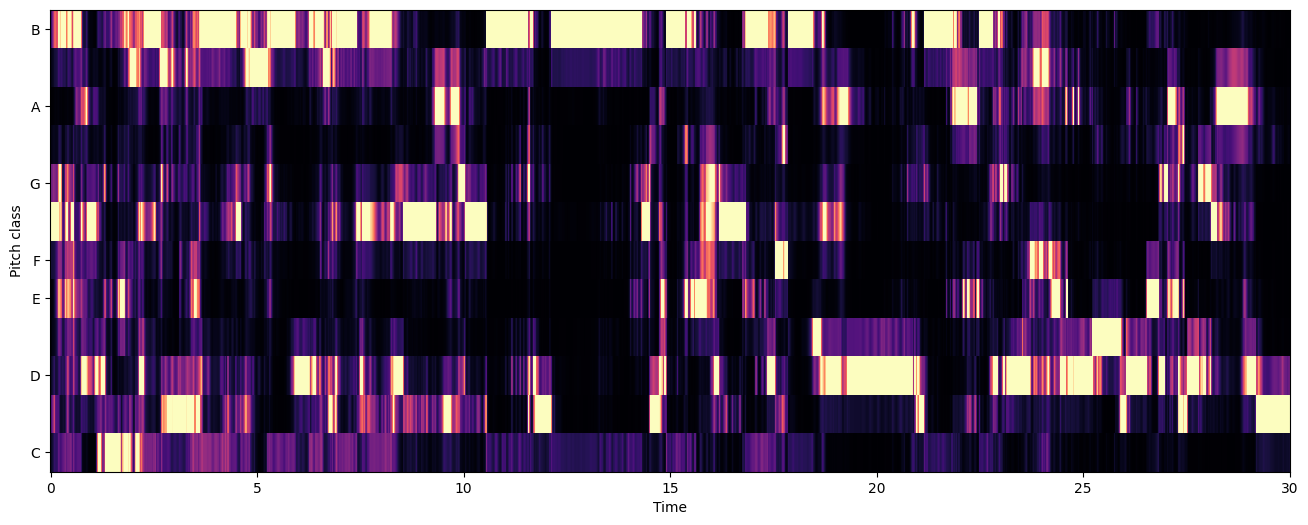

In [20]:
# Chroma Frequencies
# 크로마 특징은 음악의 흥미롭고 강렬한 표현
# 크로마는 인간 청각이 옥타브 차이가 나는 주파수를 가진 두 음을 유사음으로 인지한다는 음악이론에 기반한다. -> 화음  인식 good
# 모든 스펙트럼을 12개의 Bin으로 표현
# 12개의 Bin은 옥타브에서 12개의 각기 다른 반응(Semitones(반음) = Chroma)을 의미
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)

plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram,x_axis='time', y_axis='chroma', hop_length=512)
plt.show()

# 음악 장르 분류

### - 위의 특징들을 뽑아서 정리해놓은 csv파일 이용

In [3]:
df = pd.read_csv('/home/k0c/audio_study/features_3_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [5]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [22]:

X = df.drop(columns=['filename','length','label']) 
y = df['label'] #장르명

# minmaxscaler로 0~1 사이로 스케일
scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

X.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.355399         0.716757  0.293133  0.107955   
1          0.367322         0.670347  0.253040  0.044447   
2          0.373159         0.728067  0.296753  0.141663   
3          0.399349         0.677066  0.298024  0.075042   
4          0.355668         0.689113  0.322308  0.052149   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                0.262173               0.034784                 0.459205   
1                0.270969               0.018716                 0.470831   
2                0.265293               0.023073                 0.494051   
3                0.238427               0.023187                 0.455246   
4                0.233460               0.016451                 0.451651   

   spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0                0.094130      0.346153     0.083164  ...     0.363613   
1                0.052261      0.363722     0.051694  ...     0.468596   
2                0.059922      0.378215     0.060820  ...     0.479681   
3                0.066234      0.329587     0.070906  ...     0.386258   
4                0.047830      0.318453     0.046916  ...     0.438567   

   mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0    0.056198     0.397172    0.066062     0.371828    0.055344     0.380831   
1    0.092912     0.351681    0.074001     0.362068    0.076365     0.418452   
2    0.096704     0.420979    0.050639     0.400536    0.067509     0.433742   
3    0.067995     0.387474    0.050617     0.380430    0.050030     0.405824   
4    0.042500     0.460314    0.083860     0.388590    0.076524     0.409019   

   mfcc19_var  mfcc20_mean  mfcc20_var  
0    0.026797     0.506746    0.047781  
1    0.082414     0.593029    0.065548  
2    0.043841     0.546264    0.036062  
3    0.041898     0.562204    0.034873  
4    0.020763     0.517913    0.031713  

[5 rows x 57 columns]

In [24]:
y.value_counts()

blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: label, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [45]:
# 데이터셋 분할
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=2023)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7992, 57) (7992,)
(1998, 57) (1998,)


In [46]:
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=100, learning_rate=0.05)
xgb.fit(X_train, y_train) 

y_preds = xgb.predict(X_test) 

print('Accuracy: %.2f' % accuracy_score(y_test,y_preds))

Accuracy: 0.84


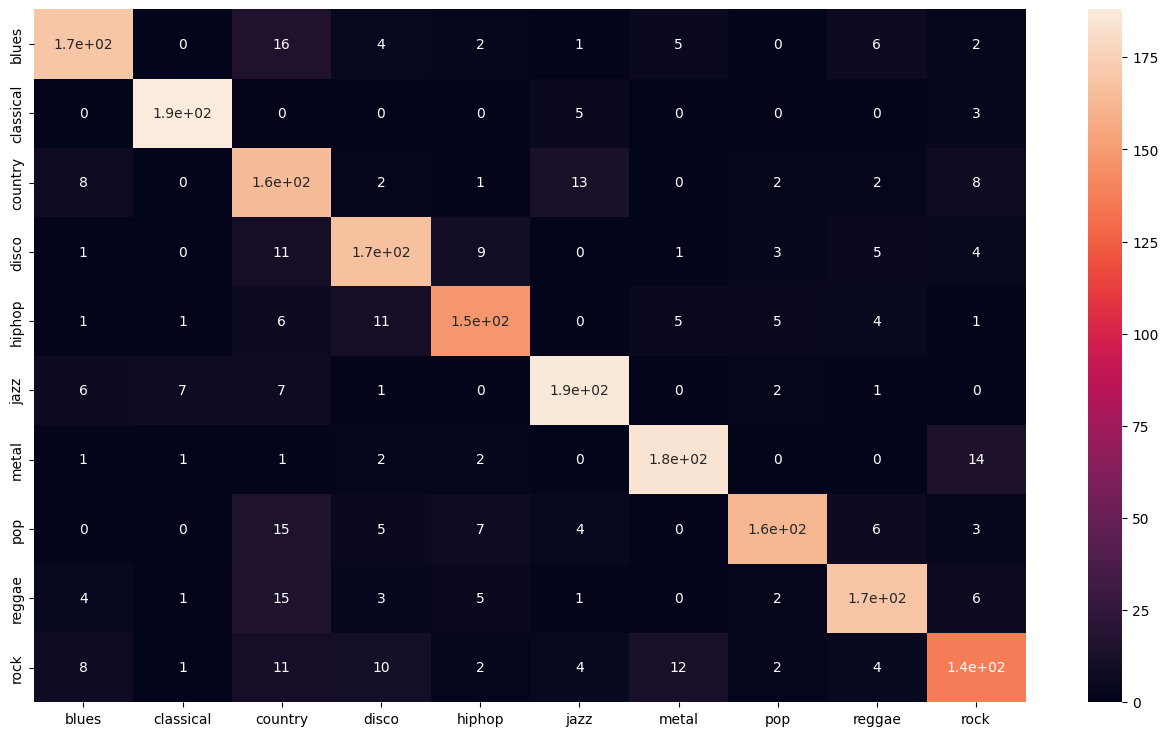

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_preds)

plt.figure(figsize=(16,9))
sns.heatmap(
    cm,
    annot=True,
    xticklabels=["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"],
    yticklabels=["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]
)
plt.show()

In [48]:
# 어떤 특징이 분류에 중요한 역할을 했는지...
for feature, importance in zip(X_test.columns, xgb.feature_importances_):
  print('%s: %.2f' % (feature, importance))

chroma_stft_mean: 0.04
chroma_stft_var: 0.03
rms_mean: 0.02
rms_var: 0.03
spectral_centroid_mean: 0.01
spectral_centroid_var: 0.02
spectral_bandwidth_mean: 0.06
spectral_bandwidth_var: 0.01
rolloff_mean: 0.02
rolloff_var: 0.03
zero_crossing_rate_mean: 0.02
zero_crossing_rate_var: 0.01
harmony_mean: 0.02
harmony_var: 0.03
perceptr_mean: 0.02
perceptr_var: 0.08
tempo: 0.02
mfcc1_mean: 0.03
mfcc1_var: 0.04
mfcc2_mean: 0.01
mfcc2_var: 0.01
mfcc3_mean: 0.01
mfcc3_var: 0.02
mfcc4_mean: 0.04
mfcc4_var: 0.01
mfcc5_mean: 0.01
mfcc5_var: 0.02
mfcc6_mean: 0.02
mfcc6_var: 0.01
mfcc7_mean: 0.01
mfcc7_var: 0.02
mfcc8_mean: 0.01
mfcc8_var: 0.01
mfcc9_mean: 0.02
mfcc9_var: 0.01
mfcc10_mean: 0.01
mfcc10_var: 0.02
mfcc11_mean: 0.01
mfcc11_var: 0.01
mfcc12_mean: 0.02
mfcc12_var: 0.01
mfcc13_mean: 0.01
mfcc13_var: 0.01
mfcc14_mean: 0.01
mfcc14_var: 0.01
mfcc15_mean: 0.01
mfcc15_var: 0.01
mfcc16_mean: 0.01
mfcc16_var: 0.01
mfcc17_mean: 0.01
mfcc17_var: 0.01
mfcc18_mean: 0.01
mfcc18_var: 0.01
mfcc19_mean: 0

# 음악 추천

#### 추출된 특징들을 비교해서 유사도가 높은 노래를 추천해주기
- 코사인유사도 사용

In [26]:
df_rs = pd.read_csv('/home/k0c/audio_study/features_3_sec.csv', index_col='filename')
df_rs.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean  \
filename                                                                 
blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

                    rms_var  spectral_centroid_mean  spectral_centroid_var  \
filename                                                                     
blues.00000.0.wav  0.003521             1773.065032          167541.630869   
blues.00000.1.wav  0.001450             1816.693777           90525.690866   
blues.00000.2.wav  0.004620             1788.539719          111407.437613   
blues.00000.3.wav  0.002448             1655.289045          111952.284517   
blues.00000.4.wav  0.001701             1630.656199           79667.267654   

                   spectral_bandwidth_mean  spectral_bandwidth_var  \
filename                                                             
blues.00000.0.wav              1972.744388           117335.771563   
blues.00000.1.wav              2010.051501            65671.875673   
blues.00000.2.wav              2084.565132            75124.921716   
blues.00000.3.wav              1960.039988            82913.639269   
blues.00000.4.wav              1948.503884            60204.020268   

                   rolloff_mean  ...  mfcc16_var  mfcc17_mean  mfcc17_var  \
filename                         ...                                        
blues.00000.0.wav   3714.560359  ...   39.687145    -3.241280   36.488243   
blues.00000.1.wav   3869.682242  ...   64.748276    -6.055294   40.677654   
blues.00000.2.wav   3997.639160  ...   67.336563    -1.768610   28.348579   
blues.00000.3.wav   3568.300218  ...   47.739452    -3.841155   28.337118   
blues.00000.4.wav   3469.992864  ...   30.336359     0.664582   45.880913   

                   mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
filename                                                              
blues.00000.0.wav     0.722209   38.099152    -5.050335   33.618073   
blues.00000.1.wav     0.159015   51.264091    -2.837699   97.030830   
blues.00000.2.wav     2.378768   45.717648    -1.938424   53.050835   
blues.00000.3.wav     1.218588   34.770935    -3.580352   50.836224   
blues.00000.4.wav     1.689446   51.363583    -3.392489   26.738789   

                   mfcc20_mean  mfcc20_var  label  
filename                                           
blues.00000.0.wav    -0.243027   43.771767  blues  
blues.00000.1.wav     5.784063   59.943081  blues  
blues.00000.2.wav     2.517375   33.105122  blues  
blues.00000.3.wav     3.630866   32.023678  blues  
blues.00000.4.wav     0.536961   29.146694  blues  

[5 rows x 59 columns]

In [27]:
labels = df_rs[['label']]
df_rs = df_rs.drop(columns=['length','label'])

df_rs_scaled = sklearn.preprocessing.scale(df_rs)  #평균 0 , 표준편차 1 

df_rs = pd.DataFrame(df_rs_scaled, columns=df_rs.columns)

df_rs.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0         -0.487808         0.640520 -0.006624  0.235568   
1         -0.403142         0.131835 -0.264944 -0.342134   
2         -0.361694         0.764491  0.016695  0.542195   
3         -0.175714         0.205477  0.024885 -0.063820   
4         -0.485895         0.337521  0.181345 -0.272072   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               -0.566828              -0.572791                -0.493983   
1               -0.508798              -0.749862                -0.425382   
2               -0.546245              -0.701852                -0.288365   
3               -0.723482              -0.700599                -0.517344   
4               -0.756246              -0.774827                -0.538557   

   spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0               -0.009229     -0.518590    -0.367952  ...    -0.750122   
1               -0.519010     -0.424118    -0.642268  ...     0.457983   
2               -0.425734     -0.346190    -0.562723  ...     0.585548   
3               -0.348881     -0.607665    -0.474804  ...    -0.489524   
4               -0.572962     -0.667537    -0.683920  ...     0.112417   

   mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0   -0.299108     0.168647   -0.425137    -0.003423   -0.376938    -0.499464   
1    0.428544    -0.327031   -0.310040    -0.112125   -0.032083    -0.066593   
2    0.503695     0.428053   -0.648762     0.316311   -0.177372     0.109337   
3   -0.065309     0.062981   -0.649076     0.092384   -0.464121    -0.211882   
4   -0.570609     0.856651   -0.167089     0.183265   -0.029476    -0.175130   

   mfcc19_var  mfcc20_mean  mfcc20_var  
0   -0.513562     0.128414   -0.291781  
1    1.011384     1.275780    0.056425  
2   -0.046244     0.653907   -0.521458  
3   -0.099501     0.865880   -0.544744  
4   -0.678995     0.276899   -0.606692  

[5 rows x 57 columns]

In [28]:
#벡터의 유사도 , 즉 벡터간의 각도를 통해 추정 cos0 =1 이므로 1에 가까울 수록 유사 / cos180 = -1 이므로 -1에 가까울 수록 다르다.

from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(df_rs)   

sim_df = pd.DataFrame(similarity, index=labels.index, columns=labels.index)

sim_df.head()

filename           blues.00000.0.wav  blues.00000.1.wav  blues.00000.2.wav  \
filename                                                                     
blues.00000.0.wav           1.000000           0.566223           0.574240   
blues.00000.1.wav           0.566223           1.000000           0.639639   
blues.00000.2.wav           0.574240           0.639639           1.000000   
blues.00000.3.wav           0.762002           0.749346           0.659545   
blues.00000.4.wav           0.761645           0.615946           0.715466   

filename           blues.00000.3.wav  blues.00000.4.wav  blues.00000.5.wav  \
filename                                                                     
blues.00000.0.wav           0.762002           0.761645           0.650941   
blues.00000.1.wav           0.749346           0.615946           0.605654   
blues.00000.2.wav           0.659545           0.715466           0.595426   
blues.00000.3.wav           1.000000           0.796544           0.787118   
blues.00000.4.wav           0.796544           1.000000           0.749515   

filename           blues.00000.6.wav  blues.00000.7.wav  blues.00000.8.wav  \
filename                                                                     
blues.00000.0.wav           0.695498           0.766532           0.760135   
blues.00000.1.wav           0.692011           0.641135           0.786465   
blues.00000.2.wav           0.750551           0.733546           0.525333   
blues.00000.3.wav           0.772266           0.810613           0.729950   
blues.00000.4.wav           0.806425           0.843051           0.619045   

filename           blues.00000.9.wav  ...  rock.00099.0.wav  rock.00099.1.wav  \
filename                              ...                                       
blues.00000.0.wav           0.627689  ...          0.221833          0.154208   
blues.00000.1.wav           0.765471  ...          0.412396          0.519078   
blues.00000.2.wav           0.580205  ...          0.290419          0.320014   
blues.00000.3.wav           0.617242  ...          0.257953          0.348760   
blues.00000.4.wav           0.618250  ...          0.339456          0.362799   

filename           rock.00099.2.wav  rock.00099.3.wav  rock.00099.4.wav  \
filename                                                                  
blues.00000.0.wav         -0.013789          0.372188          0.456640   
blues.00000.1.wav         -0.069361          0.570347          0.617002   
blues.00000.2.wav          0.056435          0.469341          0.306737   
blues.00000.3.wav         -0.088100          0.524289          0.524339   
blues.00000.4.wav         -0.159643          0.502492          0.489419   

filename           rock.00099.5.wav  rock.00099.6.wav  rock.00099.7.wav  \
filename                                                                  
blues.00000.0.wav          0.387531          0.382302          0.048050   
blues.00000.1.wav          0.634812          0.509724         -0.040774   
blues.00000.2.wav          0.432974          0.198399          0.037191   
blues.00000.3.wav          0.515108          0.395785         -0.035468   
blues.00000.4.wav          0.527737          0.423894         -0.091949   

filename           rock.00099.8.wav  rock.00099.9.wav  
filename                                               
blues.00000.0.wav          0.457812          0.353021  
blues.00000.1.wav          0.553467          0.329800  
blues.00000.2.wav          0.530360          0.192676  
blues.00000.3.wav          0.542242          0.327122  
blues.00000.4.wav          0.589148          0.380534  

[5 rows x 9990 columns]

In [34]:
def find_similar_songs(name, n=5):
  series = sim_df[name].sort_values(ascending=False)

  series = series.drop(name)


  return series.head(n).to_frame()

find_similar_songs('classical.00000.4.wav')

classical.00000.4.wav
filename                                    
classical.00002.2.wav               0.839095
classical.00002.0.wav               0.796110
classical.00005.9.wav               0.788637
classical.00024.7.wav               0.766024
classical.00002.5.wav               0.750518

In [39]:
find_similar_songs('rock.00001.0.wav')

rock.00001.0.wav
filename                           
rock.00001.1.wav           0.805657
rock.00001.3.wav           0.763680
rock.00001.4.wav           0.755024
metal.00089.1.wav          0.718580
blues.00060.6.wav          0.709832

In [40]:
find_similar_songs('hiphop.00008.2.wav')

hiphop.00008.2.wav
filename                              
hiphop.00020.5.wav            0.809377
hiphop.00020.4.wav            0.789795
hiphop.00008.4.wav            0.779601
hiphop.00014.6.wav            0.762439
hiphop.00020.0.wav            0.743169